## Particle Swarm Optimization

### Particle Class and PSO implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, fitness, dim, minx, maxx, seed):
        np.random.seed(seed)
        self.pos = (maxx - minx) *np.random.rand(dim) + minx
        self.vel = (maxx - minx) *np.random.rand(dim) + minx
        self.fitness = fitness(self.pos)
        self.best_pos = np.copy(self.pos)
        self.best_fitness = self.fitness

def pso(fitness, max_iter, n, dim, minx, maxx, w, c1, c2):
    swarm = [Particle(fitness, dim, minx, maxx, i) for i in range(n)]
    best_particle = min(swarm,key=lambda x: x.fitness)
    swarm_best_pos = np.copy(best_particle.pos)
    swarm_best_fitness  = best_particle.fitness
    swarm_best_pos_track = [swarm_best_pos]
    for iter in range(max_iter):
        if iter % 10 == 0:
            print(f"{iter} > best fitness = {swarm_best_fitness:.4e} Best position: {swarm_best_pos}")

        for particle in swarm:
            r1,r2 = np.random.rand(2)
            particle.vel = (
                (w * particle.vel) +
                (c1 * r1 * (particle.best_pos - particle.pos)) +
                (c2 * r2 * (swarm_best_pos - particle.pos))
            )
            particle.vel = np.clip(particle.vel,minx,maxx)
            particle.pos += particle.vel
            particle.fitness = fitness(particle.pos)
            if particle.fitness < particle.best_fitness:
                particle.best_fitness = particle.fitness
                particle.best_pos = np.copy(particle.pos)
            if particle.fitness < swarm_best_fitness:
                swarm_best_fitness = particle.fitness
                swarm_best_pos = np.copy(particle.pos)
                swarm_best_pos_track.append(swarm_best_pos)
    
    print("\nBest solution found:")
    print(swarm_best_pos)
    print(f"fitness of best solution = {swarm_best_fitness:.4e}")

    return swarm_best_pos, swarm_best_pos_track

In [2]:
def plot_optimization(fitness,minx,maxx,best_pos_track):
    x = np.linspace(minx,maxx,300)
    X1,X2 = np.meshgrid(x,x)
    X = np.dstack([X1,X2])
    Y = np.apply_along_axis(fitness,-1,X)
    plt.figure(figsize=(10,10))
    plt.contourf(X1,X2,Y,levels=25,cmap="Blues")
    x,y = np.array(best_pos_track).T
    plt.plot(x,y,"r")
    plt.plot(*best_pos_track[0],"o",label="start")
    plt.plot(*best_pos_track[-1],"X",label="end")
    plt.legend()
    plt.show()

In [3]:
np.set_printoptions(precision=6,suppress=True)        

w = 0.729 # inertia
c1 = 1.49445 # cognitive (particle)
c2 = 1.49445 # social (swarm)

dim = 2
num_particles = 50
max_iter = 100
minx, maxx = -10.0, 10.0

### PSO for Rastrigin Function

In [4]:
def fitness_rastrigin(x):
    x = np.array(x)
    return 10*x.shape[0] + np.sum(x**2 - 10 * np.cos(2*np.pi*x))

best_position,best_pos_track = pso(fitness_rastrigin, max_iter, num_particles, dim,minx ,maxx, w,c1,c2)

0 > best fitness = 1.1326e+01 Best position: [3.007485 0.109067]
10 > best fitness = 5.9322e-01 Best position: [ 0.045259 -0.03096 ]
20 > best fitness = 4.2081e-03 Best position: [0.004095 0.002107]
30 > best fitness = 4.2081e-03 Best position: [0.004095 0.002107]
40 > best fitness = 5.8784e-05 Best position: [0.000073 0.000539]
50 > best fitness = 2.2597e-05 Best position: [-0.000049  0.000334]
60 > best fitness = 1.2808e-05 Best position: [0.00013  0.000218]
70 > best fitness = 1.1090e-07 Best position: [-0.000015  0.000018]
80 > best fitness = 5.2063e-08 Best position: [-0.000015  0.000005]
90 > best fitness = 3.8845e-10 Best position: [-0.000001  0.000001]

Best solution found:
[-0.000001 -0.      ]
fitness of best solution = 5.9394e-11


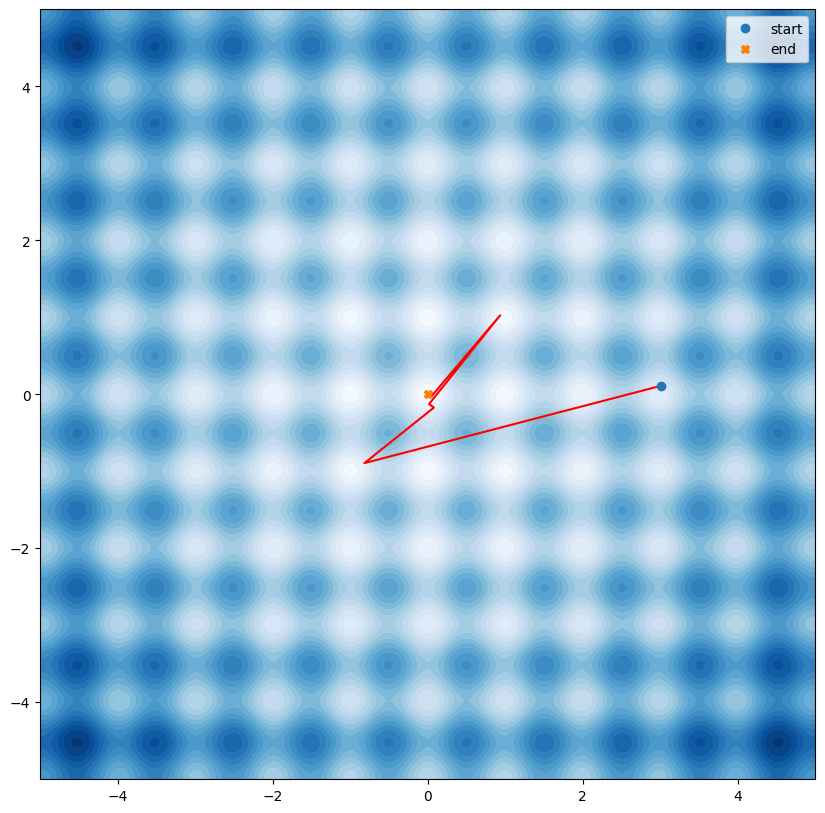

In [5]:
plot_optimization(fitness_rastrigin,-5,5,best_pos_track)

### PSO for Sphere Function

In [6]:
def fitness_sphere(x):
    x = np.array(x)
    return np.sum(x**2)

best_position, best_pos_track = pso(fitness_sphere, max_iter, num_particles, dim, -10.0, 10.0, w,c1,c2)

0 > best fitness = 9.0569e+00 Best position: [3.007485 0.109067]
10 > best fitness = 4.6315e-03 Best position: [0.039348 0.055527]
20 > best fitness = 2.8722e-04 Best position: [ 0.001121 -0.01691 ]
30 > best fitness = 9.5049e-06 Best position: [-0.000871  0.002957]
40 > best fitness = 9.6931e-07 Best position: [-0.000577  0.000798]
50 > best fitness = 9.4933e-09 Best position: [0.000091 0.000035]
60 > best fitness = 9.4933e-09 Best position: [0.000091 0.000035]
70 > best fitness = 3.5383e-09 Best position: [0.000059 0.000006]
80 > best fitness = 3.0368e-10 Best position: [ 0.000016 -0.000006]
90 > best fitness = 5.7143e-12 Best position: [ 0.000002 -0.000001]

Best solution found:
[-0.000001 -0.000002]
fitness of best solution = 4.8033e-12


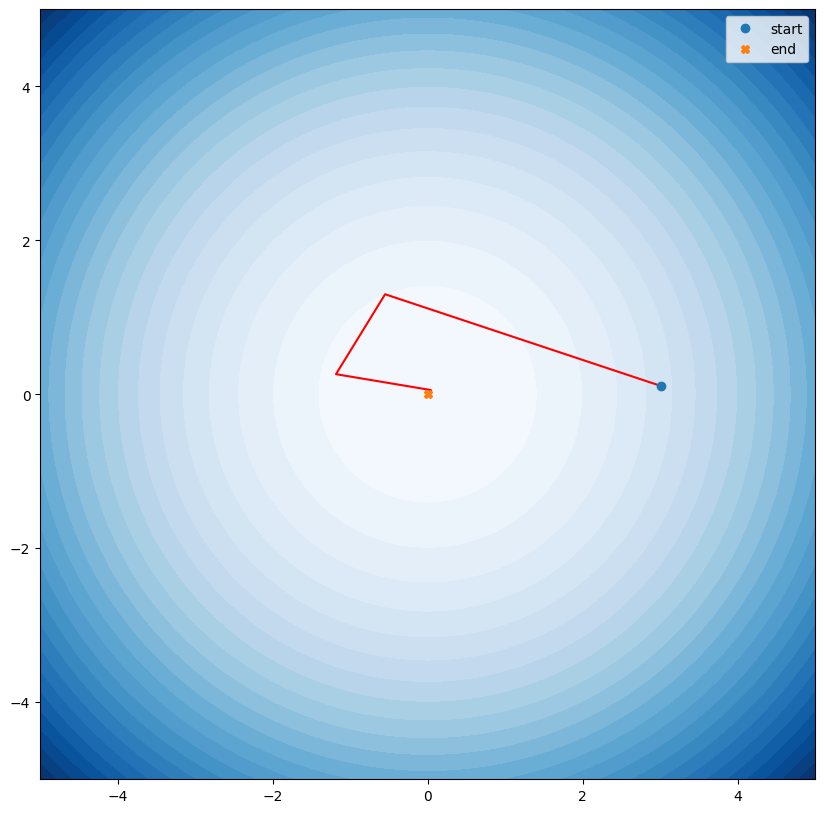

In [7]:
plot_optimization(fitness_sphere,-5,5,best_pos_track)